# Utility Tutorial: Using the Spill Analysis Module
***
In this tutorial, we guide you through the use of the GemPy utility `spill_analysis`. This module provides gradient-based functions to analyse the topography of 3D surfaces. It serves for the detection of local and global stationary points (at which the gradient is zero), i.e. minima, maxima and saddle points.

Knowledge about such topographical features can be useful or needed for example for the prediction of buoyant fluid behavior in the subsurface. We developed this module in particular for the evaluation of potential reservoirs and anticlinal traps as they might be of interest in hydrocarbon exploration or for CCS projects.

In both areas of application, the topographical shape of a sealing layer are commonly of central importance for the possibility of trap occurrences and volumes in underlying permable lithologies. One of the most common examples is a four-way closure trap, i.e. a dome-shaped sealing layer. The volumetric extent of such a trap is defined by the maximum of the cap layer and its highest saddle point, a.k.a. the spill point. This is the last point at which the top-view contours of the structure fail to close in an ellipse. The structure can fill up to this point. Past it, buoyant fluid will spill into neighboring structures or simply escape. 
Thus, knowing the depths of maxima and spill points allows for the calculation of maximum column heights and maximum trap volumes. The position of spill points can also help predict migration of fluids and their presence in other structures.
***

In [1]:
# These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../..")

# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from IPython.core.pylabtools import figsize
figsize(15, 6)

# Import the utility module
import gempy.utils.spill_analysis as sp

../..\gempy\plotting\visualization.py:36: UserWarning: Steno 3D package is not installed. No 3D online visualization available.
  warnings.warn('Steno 3D package is not installed. No 3D online visualization available.')


In [2]:
# Importing the data from csv files and setting extent and resolution
geo_data = gp.create_data([0,1000,0,1000,0,1000],[50,50,50],
                         path_o = os.pardir+"/input_data/simple_dome_orientations1.csv",
                         path_i = os.pardir+"/input_data/simple_dome_points1.csv")
geo_data.n_faults = 0

gp.set_series(geo_data, {"Dome":('Shale')},
                       order_series = ["Dome",], order_formations=['Shale',])

C:\Users\Fabian\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)
../..\gempy\data_management.py:815: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  for i in self.interfaces["formation"]]
../..\gempy\data_management.py:819: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  for i in self.orientations["formation"]]


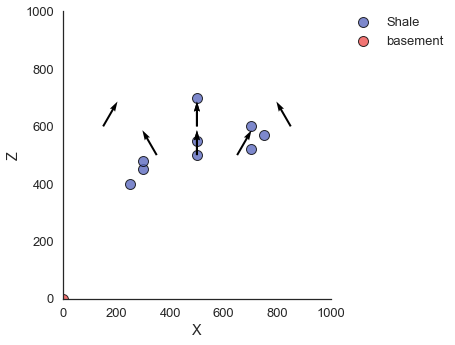

In [3]:
gp.plotting.plot_data(geo_data,direction='y')

In [4]:
interp_data = gp.InterpolatorData(geo_data,u_grade=[3],
                                  output='gradients', dtype='float64', compile_theano=True)

../..\gempy\interpolator.py:206: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  [geo_data.orientations, geo_data.interfaces]).max()[['X', 'Y', 'Z']]
../..\gempy\interpolator.py:208: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  [geo_data.orientations, geo_data.interfaces]).min()[['X', 'Y', 'Z']]
../..\gempy\interpolator.py:243: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  geo_data_rescaled.extent = copy.copy(new_coord_extent.as_matrix())
../..\gempy\interpolator.py:246: FutureWarning: Method .as_matrix will be remov

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0


In [5]:
lith_sol, fault_sol = gp.compute_model(interp_data)

../..\gempy\interpolator.py:777: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  dips_position = self.geo_data_res_no_basement.orientations[['X', 'Y', 'Z']].as_matrix()
../..\gempy\interpolator.py:778: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  dip_angles = self.geo_data_res_no_basement.orientations["dip"].as_matrix()
../..\gempy\interpolator.py:779: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  azimuth = self.geo_data_res_no_basement.orientations["azimuth"].as_matrix()
../..\gempy\interpolator.py:780: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  polarity = self.geo_data_res_no_basement.orientations["polarity"].as_matrix()
../..\gempy\interpolator.py:781: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ref_layer_points = self.pandas_ref_layer_points_rep[[

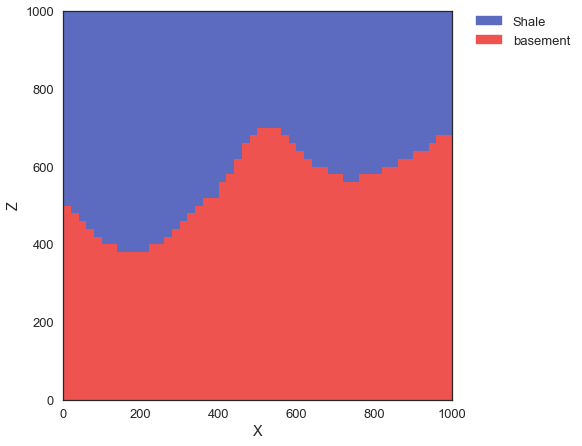

In [6]:
gp.plotting.plot_section(geo_data, lith_sol[0], 25, direction='y')

In [7]:
GX,GY,GZ=lith_sol[2].reshape(50,50,50), lith_sol[3].reshape(50,50,50), lith_sol[4].reshape(50,50,50)

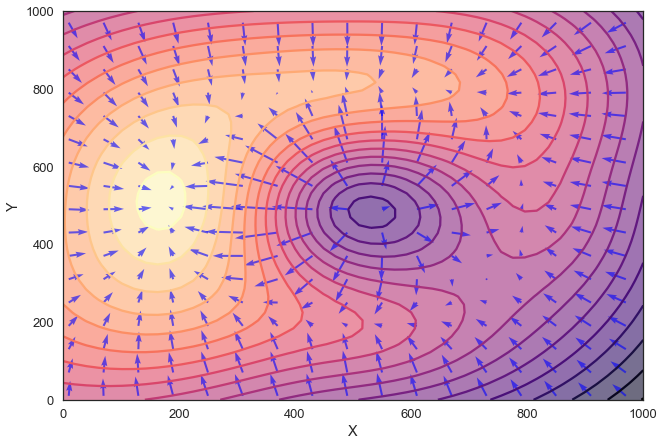

In [8]:
gp.plot_gradient(geo_data, lith_sol[1], GX, GY, GZ, 35, direction='z', quiver_stepsize=3)

In [9]:
seal_n = geo_data.formations.loc['Shale','formation_number']
seal_surf_v, seal_surf_s = gp.get_surfaces(interp_data = interp_data, potential_lith=lith_sol[1], 
                                           potential_fault=None, n_formation = seal_n)

<IPython.core.display.Javascript object>


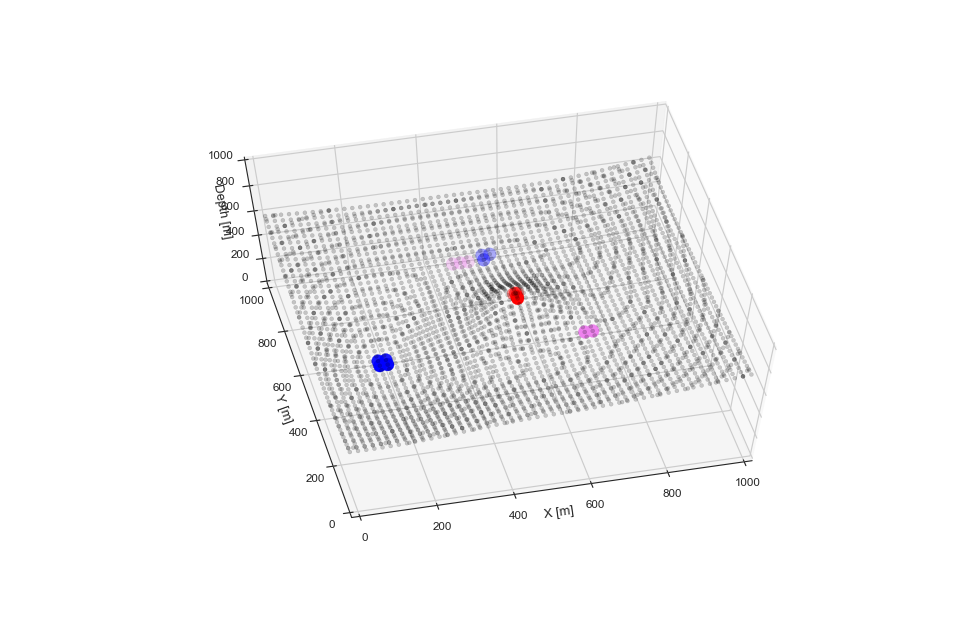

In [14]:
%matplotlib notebook
figsize(15,10)
sp.plot_surface_extrema(geo_data,seal_surf_v,GX,GY,ref='x')

In [19]:
GXY = GX + GY
gxy_signs = np.sign(GXY)

# empty holder arrays for inserting minima and maxima
gx_maxima = np.zeros_like(GX)
gy_maxima = np.zeros_like(GY)
gx_minima = np.zeros_like(GX)
gy_minima = np.zeros_like(GY)

# create boolean arrays where signchange voxels are True
signchange_gxy = ((np.roll(gxy_signs, 1, axis=0) - gxy_signs) != 0).astype(int)
# avoid border error from np.roll by setting relevant border to False
signchange_gxy[0, :, :] = 0

signchange_gyx = ((np.roll(gxy_signs, 1, axis=1) - gxy_signs) != 0).astype(int)
signchange_gyx[:, 0] = 0

gyx = np.logical_or(signchange_gxy, signchange_gyx)

../..\gempy\gempy_front.py:954: FutureWarning: gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead
  "use gempy.plotting module instead", FutureWarning)


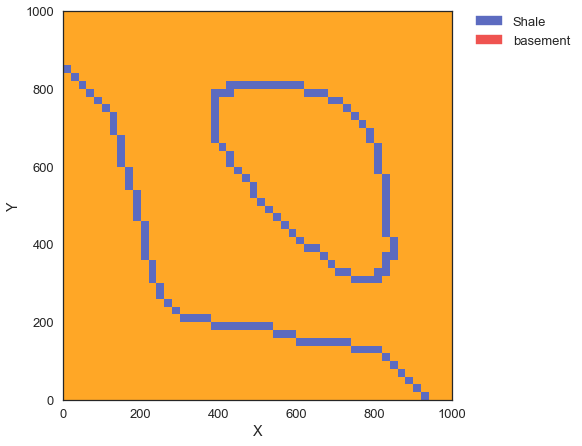

In [20]:
%matplotlib inline
gp.plot_section(geo_data, gyx, 35, direction = 'z')